In [2]:
import numpy as np
import requests, gzip, os, hashlib
import matplotlib.pyplot as plt

In [3]:
path="./mnist_data/"

In [4]:
#fetch data
# path='./mnist-v-8/'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
X_test1 = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28,28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

(28, 28)

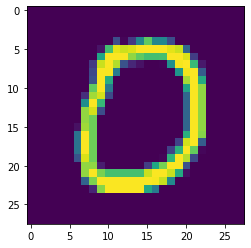

In [5]:
test=X_test1[10]
plt.imshow(test)
np.shape(test)

In [6]:
#Validation split
#Xtrain and val are images
#Ytrain and val are labels
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
Y_train,Y_val=Y[train_no],Y[val_no]

5

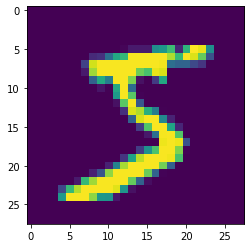

In [7]:
# X_val
plt.imshow(X_val[0])
Y_val[0]

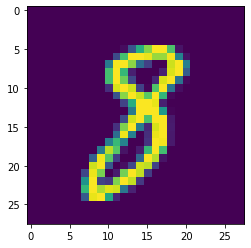

In [8]:
# X_train
X_train[0]
plt.imshow(X_train[0])

In [9]:
Y_train[0]
# plt.imshow(Y_train[0])

8

In [44]:
#Sigmoid funstion
def sigmoid(x):
    return np.tanh(x)

#derivative of sigmoid
def d_sigmoid(x):
    return ((1/(np.cosh(x)))*2)

In [11]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [12]:
def init(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(28*28,256)
l2=init(28*28,128)
l3=init(128,10)

In [13]:
+Y_train

array([8, 4, 5, ..., 7, 9, 2], dtype=uint8)

In [14]:
ex=np.array(Y_train[1]).reshape(1,1)
ex

array([[4]], dtype=uint8)

In [15]:
example_out = np.zeros((len(ex),10), np.float32)
example_out[range(example_out.shape[0]),ex] = 1
example_out

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
#forward and backward pass
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    
    x_l2=x_sigmoid.dot(l2)
    x_l3=sigmoid(x_l2)
    
    x_l4=x_l4.dot(l3)
    out= softmax(x_l4)
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error
    
#     error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
#     update_l2=x_sigmoid.T@error
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2 


In [57]:
x_l4=[]
targets = np.zeros((len(y),10), np.float32)
targets[range(targets.shape[0]),y] = 1
 
    
x_l1=x.dot(l1)
x_sigmoid=sigmoid(x_l1)
    
x_l2=x_sigmoid.dot(l2)
x_l3=sigmoid(x_l2)
    
# x_l4=x_l4.dot(l3)
# out= softmax(x_l4)
 
error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
update_l2=x_sigmoid.T@error
error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
update_l1=x.T@error


In [58]:
targets

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
x_sigmoid.T@error

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [51]:
epochs=10000
lr=0.00001
batch=128

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1,28*28))
    y=Y_train[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
    
    if(i%20==0):    
        X_val=X_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)),axis=1)
        val_acc=(val_out==Y_val).mean()
        val_accuracies.append(val_acc.item())
    if(i%250==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')



For 0th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 250th epoch: train accuracy: 0.117 | validation accuracy:0.100
For 500th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 750th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 1000th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 1250th epoch: train accuracy: 0.109 | validation accuracy:0.100
For 1500th epoch: train accuracy: 0.086 | validation accuracy:0.100
For 1750th epoch: train accuracy: 0.125 | validation accuracy:0.100
For 2000th epoch: train accuracy: 0.062 | validation accuracy:0.100
For 2250th epoch: train accuracy: 0.125 | validation accuracy:0.100
For 2500th epoch: train accuracy: 0.086 | validation accuracy:0.100
For 2750th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 3000th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 3250th epoch: train accuracy: 0.094 | validation accuracy:0.100
For 3500th epoch: train accuracy: 0.086 | validation a

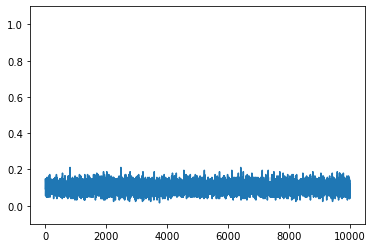

In [52]:
plt.ylim(-0.1, 1.1)
plt.plot(accuracies)


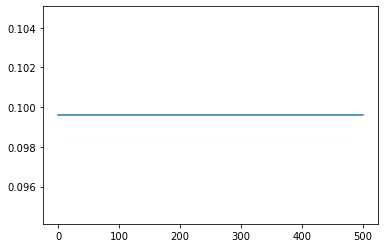

In [47]:
plt.plot(val_accuracies)

In [48]:
test_out=np.argmax(softmax(sigmoid(X_test.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==Y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')
 

Test accuracy = 9.80%


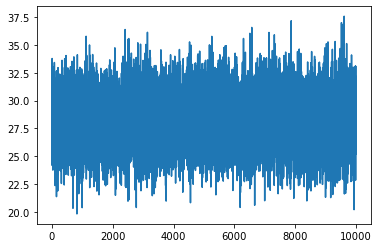

In [50]:
losses
plt.plot(losses)

In [ ]:
y

In [ ]:
m = [[0,0,0,0,0,0,0],
     [0,10,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
imshow(m.reshape(28,28))

m.shape

In [ ]:
x2 = (sigmoid(m.dot(l1)).dot(l2))
x3=(np.argmax(x2))
print(x2)
print(x3)

In [ ]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
imshow(m.reshape(28,28))

m.shape
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

In [ ]:
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

In [ ]:
n = [[0,10,10,10,0,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,10,10,0,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,10,10,10,0,0,0]]

n = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in n])
n=n.reshape(1,-1)
imshow(n.reshape(28,28))
x = np.argmax(sigmoid(n.dot(l1)).dot(l2),axis=1)
x

In [ ]:
x = (sigmoid(n.dot(l1)).dot(l2))
print(x)
print(np.argmax(x,axis=1))

In [ ]:
n = [[0,0,10,10,0,0,0],
     [0,10,0,0,10,0,0],
     [0,10,0,0,10,0,0],
     [0,10,10,10,0,0,0],
     [0,0,10,10,0,0,0],
     [0,0,0,0,10,0,0],
     [0,0,10,10,0,0,0]]

n = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in n])
# n

In [ ]:
n=n.reshape(1,-1)
imshow(n.reshape(28,28))
x1 = np.argmax(sigmoid(n.dot(l1)).dot(l2),axis=1)
x1

#  7 results

In [44]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]


In [45]:
np.shape(m)

(7, 7)

In [ ]:
X_train[0]

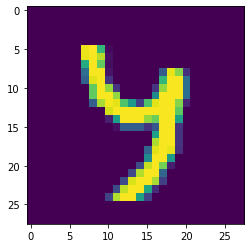

In [32]:
plt.imshow(X_train[1])

In [33]:
w=X_train[1]

array([0])

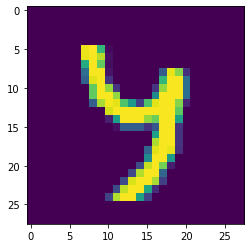

In [34]:

m = np.concatenate([np.concatenate([[x] for x in y]) for y in w])
m=m.reshape(1,-1)
plt.imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

In [30]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

NameError: name 'imshow' is not defined

array([0])

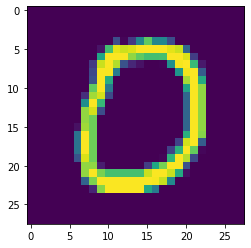

In [79]:

m = np.concatenate([np.concatenate([[x] for x in y]) for y in test])
m=m.reshape(1,-1)
plt.imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

In [20]:
X_train[0].shape

(28, 28)

In [21]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)

In [24]:
np.shape(m)

(1, 784)

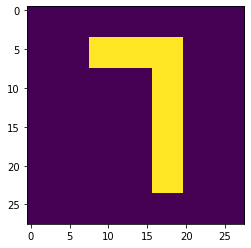

In [31]:
plt.imshow(m.reshape(28,28))

In [32]:
t=X_train[0]

In [33]:
t.reshape(1,-1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  11,  82, 255, 224,  52,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 154, 252, 253,
        252, 252, 246, 152,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [34]:
m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in t])


In [35]:
m

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
x1 = np.argmax(sigmoid(n.dot(l1)).dot(l2),axis=1)
